In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.tree import export_graphviz
import graphviz

In [186]:
# 유니코드 깨짐현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
matplotlib.rcParams['font.family']='NanumGothic'

# 데이터 처리

##  데이터 불러오기

In [5]:
df_raw=pd.read_csv("C:/python/2. Big Data 분석/SCALE불량.csv", encoding='euc-kr')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2021-08-01:08:00:01,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2021-08-01:08:07:11,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2021-08-01:08:14:21,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2021-08-01:08:21:31,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2021-08-01:08:28:41,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


**<변수 설명>** <br>
- PLATE_NO : Plate Number(ID)
- ROLLING_DATE : 작업 시각
- __SCALE : Scale 불량 여부 (양품/불량) *목표변수*__
- SPEC : 제품 규격
- STEEL_KIND : 강종
- PT_THICK : Plate 두께
- PT_WIDTH : Plate 폭
- PT_LENGTH : Plate 길이
- PT_WEIGHT : Plate 중량
- FUR_NO : 가열로 호기(1,2,3호기)
- FUR_NO_ROW : 가열로 열(1,2열)
- FUR_HZ_TEMP : 가열로 가열대 온도
- FUR_HZ_TIME : 가열로 가열대 시간
- FUR_SZ_TEMP : 가열로 균열대 온도
- FUR_SZ_TIME : 가열로 균열대 시간
- FUR_TIME : 가열로 재로시간
- FUR_EXTEMP : 가열대 추출온도
- ROLLING_TEMP_T5 : 압연온도
- HSB : HSB적용 (1-적용, 0-미적용)
- ROLLING_DESCALING : 압연 중 Descaling 횟수
- WORK_GR : 작업조

In [6]:
df_raw.shape

(720, 21)

변수 총 21개, 자료 총 720개로 구성됨

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THICK           720 non-null    float64
 6   PT_WIDTH           720 non-null    int64  
 7   PT_LENGTH          720 non-null    int64  
 8   PT_WEIGHT          720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    object 
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

* **범주형 변수** : </br>
PLATE_NO, ROLLING_DATE, SCALE, SPEC, STEEL_KIND, FUR_NO, FUR_NO_ROW, HSB, WORK_GR 
* **연속형 변수** : </br>
PT_THICK, PT_WIDTH, PT_LENGTH, PT_WEIGHT,FUR_HZ_TEMP, FUR_HZ_TIME, FUR_SZ_TEMP, FUR_SZ_TIME, FUR_TIME, FUR_EXTEMP, ROLLING_TEMP_T5, ROLLING_DESCALING  

In [8]:
df_raw.describe(include='all')

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
count,720,720,720,720,720,720.000000,720.000000,720.000000,720.000000,720,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720,720.000000,720
unique,720,720,2,66,9,NaN,NaN,NaN,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4
top,PB562774,2021-08-01:08:00:01,양품,JS-SM490YB,C0,NaN,NaN,NaN,NaN,3호기,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,적용,NaN,4조
freq,1,1,489,84,503,NaN,NaN,NaN,NaN,243,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,687,NaN,194
mean,NaN,NaN,NaN,NaN,NaN,29.267857,2807.127778,34323.269444,41481.777778,NaN,...,1155.338889,88.204167,1149.666667,75.330556,300.563889,1139.570833,933.920833,NaN,8.319444,NaN
std,NaN,NaN,NaN,NaN,NaN,19.152651,517.839690,13828.434837,24751.322015,NaN,...,20.866398,36.248696,17.571788,26.086390,45.390303,17.857121,107.863887,NaN,1.623252,NaN
min,NaN,NaN,NaN,NaN,NaN,12.030000,1800.000000,7893.000000,7820.000000,NaN,...,1103.000000,43.000000,1113.000000,35.000000,221.000000,1102.000000,0.000000,NaN,5.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,16.090000,2466.000000,22663.000000,17757.500000,NaN,...,1139.000000,65.000000,1132.000000,57.750000,257.000000,1122.750000,889.750000,NaN,6.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,20.130000,2725.000000,37380.000000,36120.000000,NaN,...,1158.000000,75.000000,1155.000000,67.500000,304.000000,1144.000000,951.000000,NaN,8.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,40.000000,3125.000000,43735.000000,61120.000000,NaN,...,1171.000000,101.000000,1164.000000,85.250000,342.000000,1154.000000,994.250000,NaN,10.000000,NaN


In [9]:
df_raw['SCALE'].value_counts()

양품    489
불량    231
Name: SCALE, dtype: int64

목표변수 **Scale** 데이터 중 양품 489개, 불량 231개 <br>
따라서 양품 67.9%, 불량 32% 대략 2:1의 비율을 만족한다.


PLATE_NO, ROLLING_DATE는 Scale 불량 원인 파악하는데 필요한 변수가 아니기 때문에 제거한다.

In [10]:
df=df_raw.drop(['PLATE_NO', 'ROLLING_DATE'], axis=1, inplace=False)

In [11]:
df.head()

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조


## 결측치 확인

In [12]:
df.isnull().sum()

SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THICK             0
PT_WIDTH             0
PT_LENGTH            0
PT_WEIGHT            0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

결측치는 존재하지 않는다.

## 그래프 탐색 및 이상치 확인

변수 별 그래프 탐색을 위해 bar plot과 histogram 함수 선언

In [13]:
# bar plot 함수 선언
def fun_plot_bar(data,var):
    data[data['SCALE']=='양품'][var].value_counts().plot.bar(label='양품', alpha=0.5, color='None',figsize=(10,8))
    data[data['SCALE']=='불량'][var].value_counts().plot.bar(label='불량', alpha=0.5, color='orange', figsize=(10,8))
    plt.legend()

In [14]:
# histogram 함수 선언
def fun_plot_hist(data, var) :
    plt.hist(data[data['SCALE']=='양품'][var], label='양품', alpha=0.5)
    plt.hist(data[data['SCALE']=='불량'][var], label='불량', alpha=0.5)
    plt.legend()

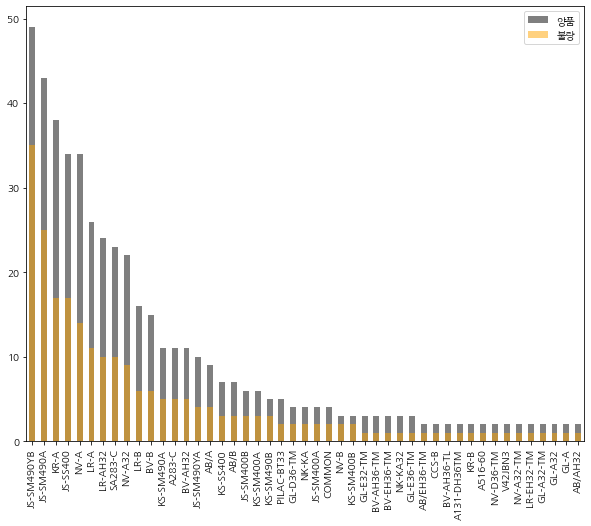

In [15]:
fun_plot_bar(df,'SPEC')

SPEC 별로 양품, 불량 비율 확인한 결과 목표변수의 불량, 양품 비율과 거의 유사하게 나타난다. 따라서 SPEC은 Scale불량에 크게 영향을 미치는 변수가 아님을 유추할 수 있다.

In [16]:
df['STEEL_KIND'].unique()

array(['T1', 'T8', 'T0', 'T5', 'C0', 'C3', 'C1', 'T7', 'T3'], dtype=object)

STEEL_KIND 변수 확인 결과, 총 9개의 범주가 존재하나, 강종에 관련된 데이터임을 고려할 때 T로 시작하는 데이터는 티타늄강을, C로 시작하는 데이터는 탄소강을 의미함을 알 수 있다. 따라서 효율적인 분석을 위해 티타늄강은 T로, 탄소강은 C로 매핑한다.

In [17]:
def func1(x) :
    if x[0]=='T':
        return 'T'
    elif x[0]=='C' :
        return 'C'
df['STEEL_KIND']=df['STEEL_KIND'].apply(func1)

In [18]:
df.head()

,SCALE,SPEC,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T,32.25,3707,15109,14180,1호기,1열,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,AB/EH32-TM,T,32.25,3707,15109,14180,1호기,2열,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,NV-E36-TM,T,33.27,3619,19181,18130,2호기,1열,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,NV-E36-TM,T,33.27,3619,19181,18130,2호기,2열,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,BV-EH36-TM,T,38.33,3098,13334,12430,3호기,1열,1140,134,1128,48,314,1118,873,적용,8,1조


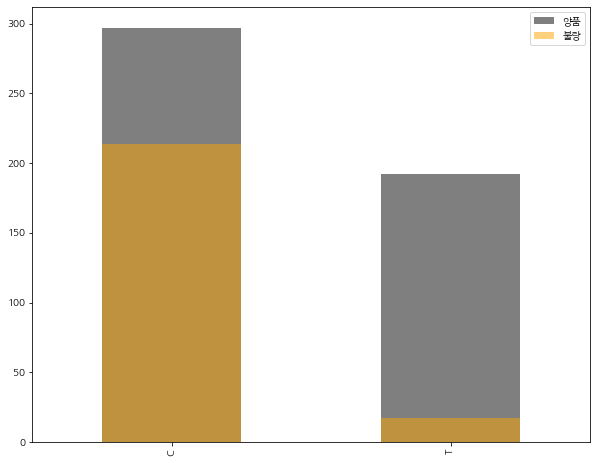

In [19]:
fun_plot_bar(df, 'STEEL_KIND')

그래프 분포 확인 결과, 탄소강이 티타늄강보다 불량률이 훨씬 크다는 것을 확인할 수 있다.

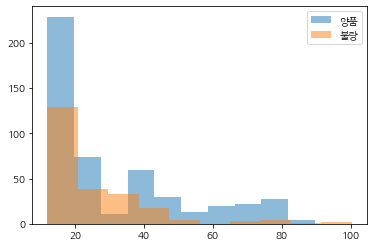

In [20]:
fun_plot_hist(df, 'PT_THICK')

PT_THICK 값이 작을 때 불량이 더 많이 발생한다고 유추할 수 있다.

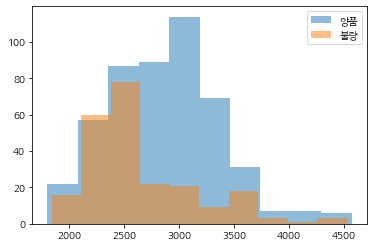

In [21]:
fun_plot_hist(df, 'PT_WIDTH')

PT_WIDTH 값이 작을 때 불량이 더 많이 발생한다고 유추할 수 있다.

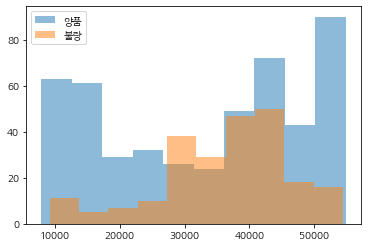

In [22]:
fun_plot_hist(df, 'PT_LENGTH')

PT_LENGTH와 불량/양품 관계가 불균형하게 나타나므로 유의미한 설명변수라고 유추할 수 있다.

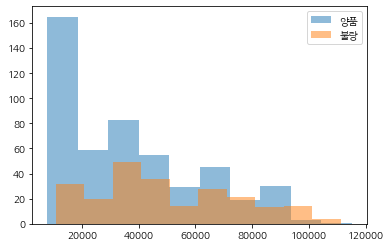

In [23]:
fun_plot_hist(df, 'PT_WEIGHT')

PT_WEIGHT와 불량/양품 관계가 불균형하게 나타나므로 유의미한 설명변수라고 유추할 수 있다.

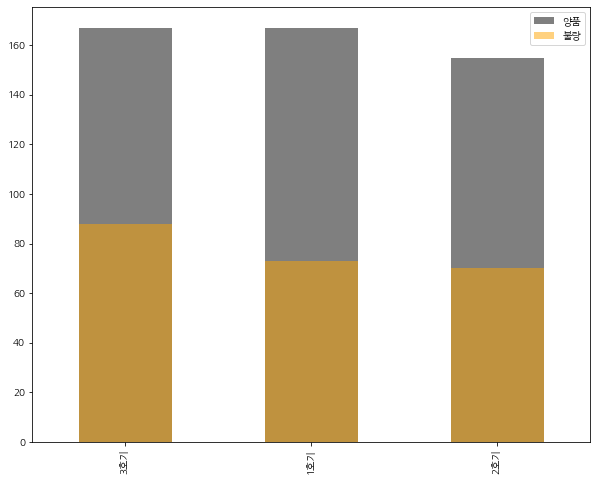

In [24]:
fun_plot_bar(df, 'FUR_NO')

가열로 호기와 불량/양품 개수 비율이 거의 유사한 것으로 보아 Scale 불량의 원인이 아니라는 것을 유추할 수 있다.

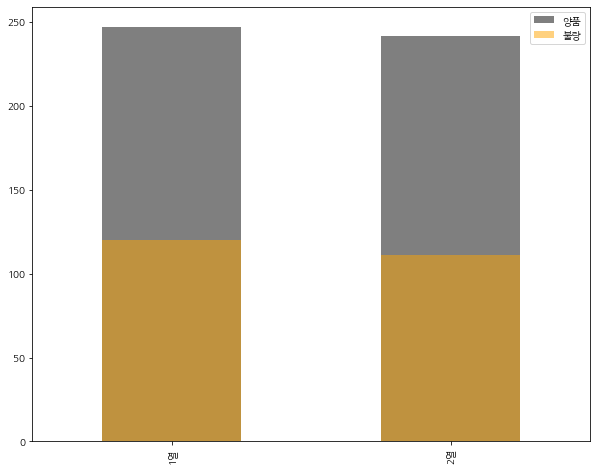

In [25]:
fun_plot_bar(df, 'FUR_NO_ROW')

가열로 열과 불량/양품 개수 비율이 거의 유사한 것으로 보아 Scale 불량의 원인이 아니라는 것을 유추할 수 있다.

추가로 가열로 호기 별 가열로 열의 불량률을 비교한다.

In [26]:
# 가열로 호기 별 가열로 열 비교
df2=pd.DataFrame(df[['SCALE', 'FUR_NO', 'FUR_NO_ROW']].groupby(['FUR_NO','FUR_NO_ROW'], as_index=False)['SCALE'].value_counts())
df2

,FUR_NO,FUR_NO_ROW,SCALE,count
0,1호기,1열,양품,77
1,1호기,1열,불량,42
2,1호기,2열,양품,90
3,1호기,2열,불량,31
4,2호기,1열,양품,86
5,2호기,1열,불량,35
6,2호기,2열,양품,81
7,2호기,2열,불량,35
8,3호기,1열,양품,79
9,3호기,1열,불량,43


Text(0.5, 0, '1호기 2열')

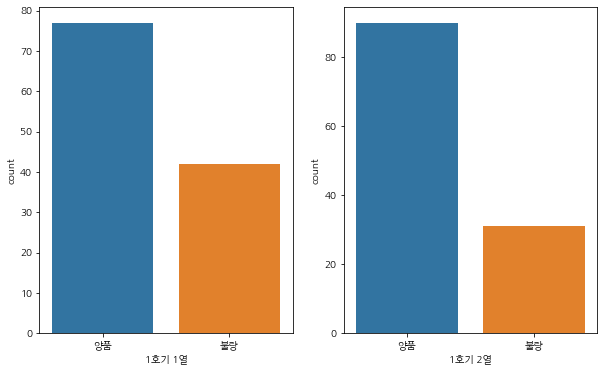

In [27]:
# 1호기 1열과 2열 사이의 불량, 양품 비교
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
data=df2[df2['FUR_NO']=='1호기'][0:2]
sns.barplot(data=data, x='SCALE', y='count')
plt.xlabel('1호기 1열')

plt.subplot(1,2,2)
data=df2[df2['FUR_NO']=='1호기'][2:4]
sns.barplot(data=data, x='SCALE', y='count')
plt.xlabel('1호기 2열')

Text(0.5, 0, '2호기 2열')

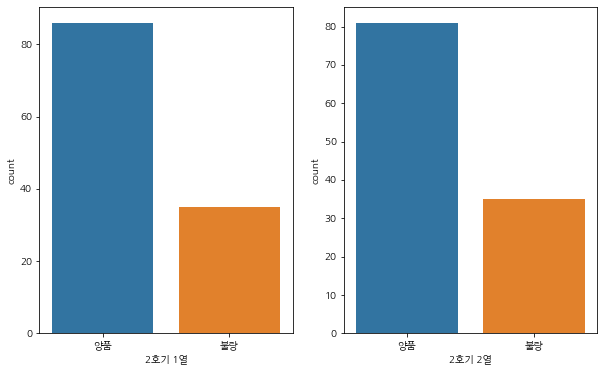

In [28]:
# 2호기 1열과 2열 사이의 불량, 양품 비교
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
data=df2[df2['FUR_NO']=='2호기'][0:2]
sns.barplot(data=data, x='SCALE', y='count')
plt.xlabel('2호기 1열')

plt.subplot(1,2,2)
data=df2[df2['FUR_NO']=='2호기'][2:4]
sns.barplot(data=data, x='SCALE', y='count')
plt.xlabel('2호기 2열')

Text(0.5, 0, '3호기 2열')

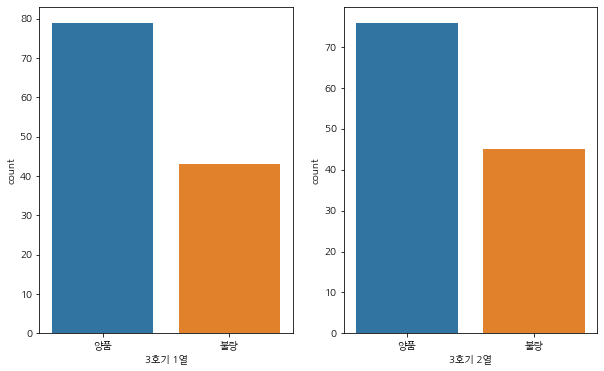

In [29]:
# 3호기 1열과 2열 사이의 불량, 양품 비교
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
data=df2[df2['FUR_NO']=='3호기'][0:2]
sns.barplot(data=data, x='SCALE', y='count')
plt.xlabel('3호기 1열')

plt.subplot(1,2,2)
data=df2[df2['FUR_NO']=='3호기'][2:4]
sns.barplot(data=data, x='SCALE', y='count')
plt.xlabel('3호기 2열')

각 가열로 호기와 각 가열로 열의 불량/양품 개수를 비교한 결과, 1호기 1열의 불량률이 1호기 2열의 불량률보다 조금 더 높기는 하나 대부분의 가열로에서는 큰 차이를 보이지 않았다. 따라서 유의미한 원인이라고 파악되지 않는다.

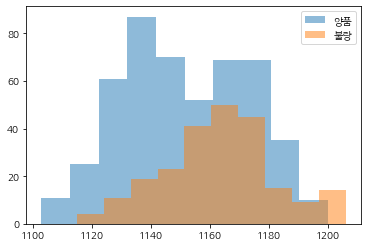

In [30]:
fun_plot_hist(df, 'FUR_HZ_TEMP')

가열로 가열대 온도가 높을수록 불량률이 좀 더 많은 것으로 파악된다.

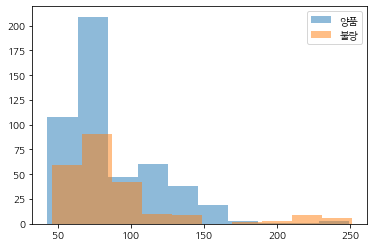

In [31]:
fun_plot_hist(df, 'FUR_HZ_TIME')

가열로 가열대 시간에 대한 불량, 양품 여부를 그래프로 표현했을 때 불연속적인 분포를 보이며 불량, 양품 비율에서 차이를 보이는 것으로 보아 유의미한 변수일 수 있음을 유추할 수 있다.

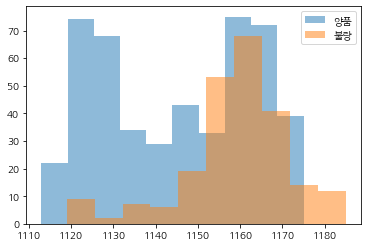

In [32]:
fun_plot_hist(df, 'FUR_SZ_TEMP')

가열로 균열대 온도가 높을수록 불량률이 높은 것으로 보아 유의미한 변수라고 파악된다.

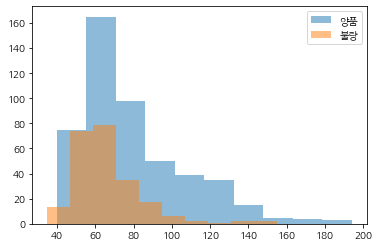

In [33]:
fun_plot_hist(df, 'FUR_SZ_TIME')

가열로 균열대 시간에 대한 불량/양품 개수를 그래프로 파악했을 때 불연속적인 분포를 보이며 시간마다 불량,양품 비율이 상당한 차이를 보이는 것으로 보아 유의미한 변수일 수 있음을 파악할 수 있다.

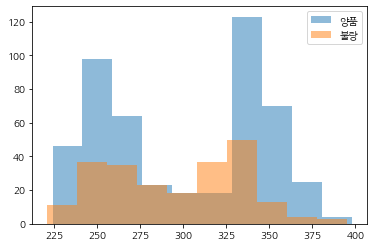

In [34]:
fun_plot_hist(df, 'FUR_TIME')

가열로 재로시간에 대해 불량/양품 비율이 시간마다 다르게 나타나므로 유의미한 변수일 수 있음을 유추할 수 있다.

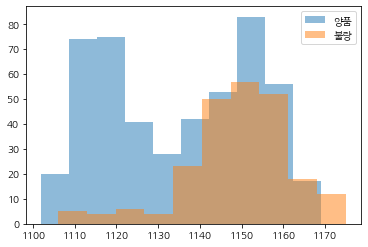

In [35]:
fun_plot_hist(df, 'FUR_EXTEMP')

가열대 추출온도가 높을수록 불량률이 높은 것으로 보아 유의미한 변수이다.

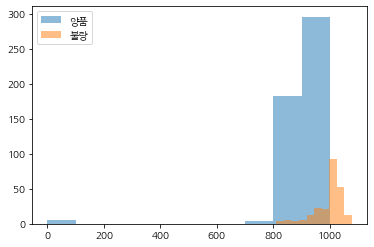

In [36]:
fun_plot_hist(df, 'ROLLING_TEMP_T5')

압연온도에 따라 불량/양품 비율에 상당한 차이를 보이므로 유의미한 변수일 것으로 파악할 수 있다.

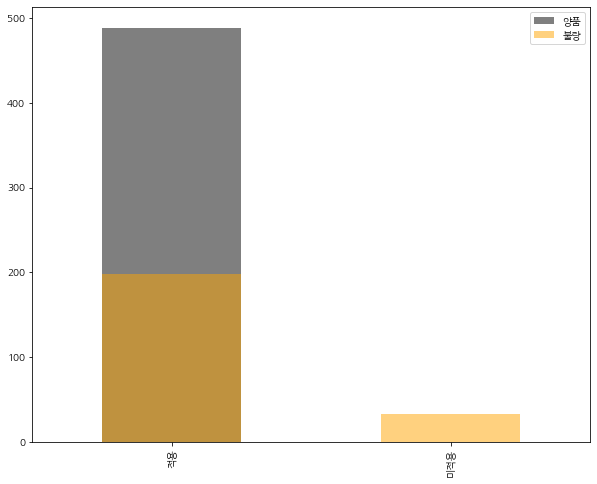

In [37]:
fun_plot_bar(df, 'HSB')
# Barplot으로 바꾸기

HSB를 적용하지 않았을 때 모두 불량이 발생하였으며, HSB를 적용하였을 때 약간의 불량이 발생하였다. 따라서 분석 시 HSB 적용, 미적용 여부를 나누어 파악해볼 필요가 있다.

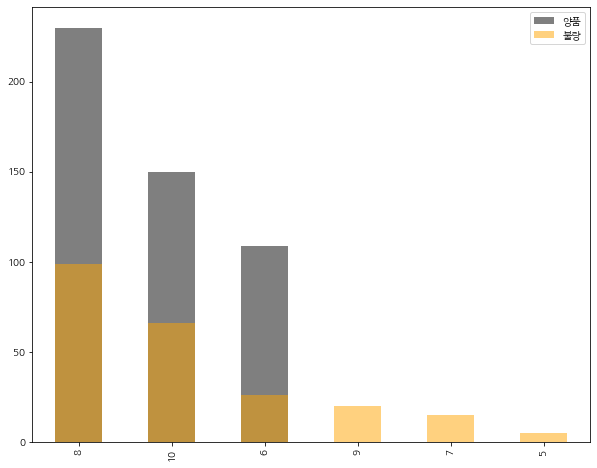

In [38]:
fun_plot_bar(df,'ROLLING_DESCALING')

압연 중 Descaling 횟수에 따라 불량/양품에 상당한 차이를 보인다. 또한 Descaling 횟수가 무조건 증가한다고 scale 불량이 감소하는 것은 아니다. 따라서 descaling 횟수와 scale 불량 간의 선형적인 관계는 존재하지 않는다.

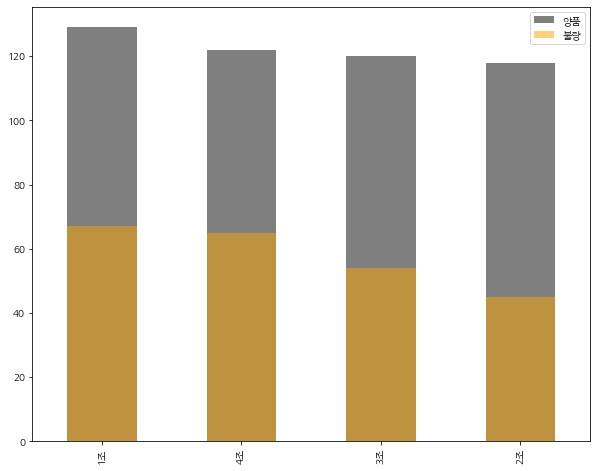

In [39]:
fun_plot_bar(df,'WORK_GR')

각 근무조에서 불량/양품 비율이 동일한 추세를 보인다. 따라서 작업조는 scale 불량 여부에 유의미한 변수가 아니다.

위의 그래프 탐색 결과, scale 불량과 직접적인 연관이 없는 제품 규격, 가열로 호기, 가열로 열, 작업조에 관한 변수를 삭제한다. 

In [40]:
# SPEC, FUR_NO, FUR_NO_ROW, WORK_GR 변수 제거
df.drop(['SPEC', 'FUR_NO', 'FUR_NO_ROW', 'WORK_GR'], axis=1, inplace=True)

In [41]:
df.head()

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,양품,T,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,적용,8
1,양품,T,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,적용,8
2,양품,T,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,적용,8
3,양품,T,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,적용,8
4,양품,T,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,적용,8


In [42]:
df.shape

(720, 15)

따라서 총 15개 변수, 720개 데이터가 남았다.

## 이상치 확인

In [43]:
# 이상치 확인을 위한 그래프 함수
def outlier(data,var) :
    data[[var]].boxplot()
    data[[var]].hist()

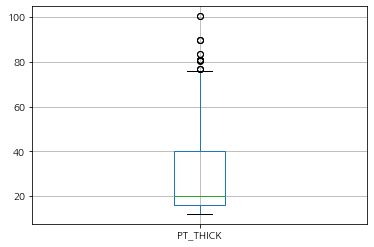

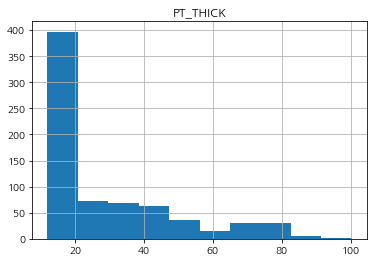

In [44]:
outlier(df, 'PT_THICK')

In [45]:
df[df['PT_THICK']>80]

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
85,불량,T,83.32,2560,10409,17430,1124,77,1124,99,342,1112,846,미적용,6
86,양품,T,83.32,2560,10409,17430,1116,77,1122,100,342,1107,839,적용,6
87,양품,T,89.63,2560,10381,18700,1130,78,1125,100,332,1117,843,적용,6
88,양품,T,89.63,2560,10381,18700,1129,87,1123,104,332,1112,844,적용,6
89,양품,T,89.63,2560,10381,18700,1129,78,1126,100,338,1117,841,적용,6
157,불량,C,80.28,2503,10511,33160,1157,68,1159,67,312,1146,1068,적용,6
489,양품,T,80.83,2895,9788,17980,1139,132,1124,80,382,1109,877,적용,6
492,불량,T,80.82,2085,13176,17430,1138,131,1128,55,364,1122,876,미적용,6
493,양품,T,80.82,2085,12919,17090,1132,78,1122,71,376,1113,842,적용,6
494,양품,T,80.82,2085,12919,17090,1133,89,1122,59,378,1112,0,적용,6


plate 두께가 100mm이하일 때는 후판, 100mm 이상일 때는 극후판으로 분리되나 모두 후판 압연공정에서 나올 수 있는 플레이트 두께값으로 이상치로 판단하지 않고 진행한다.

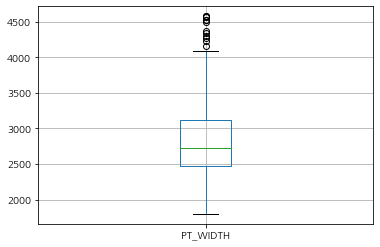

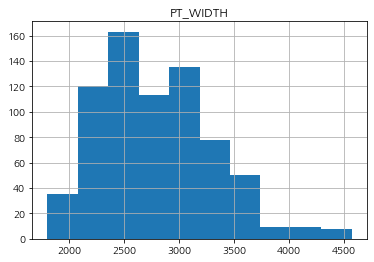

In [46]:
outlier(df, 'PT_WIDTH')

PT_WIDTH 역시 약간의 이상치로 보이는 값들이 확인되나 후판공정에서 다뤄지는 플레이트 너비로 이상치가 아니라 판단하였다.

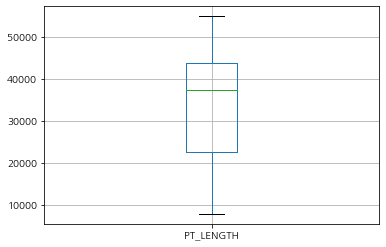

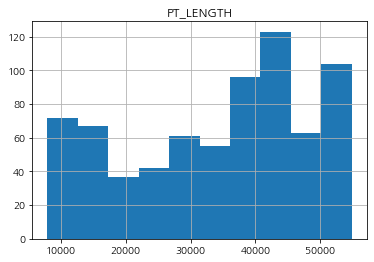

In [47]:
outlier(df, 'PT_LENGTH')

PT_LENGTH에서는 이상치를 확인하지 못했다.

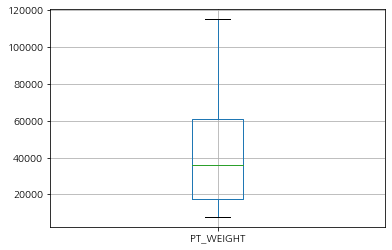

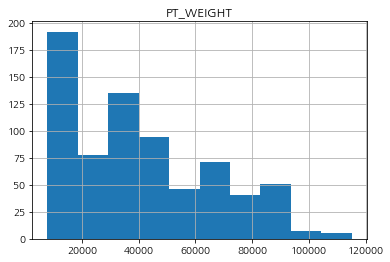

In [49]:
outlier(df, 'PT_WEIGHT')

PT_WEIGHT에서 역시 이상치를 확인하지 못했다.

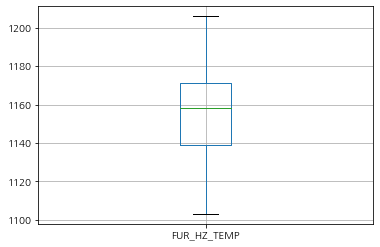

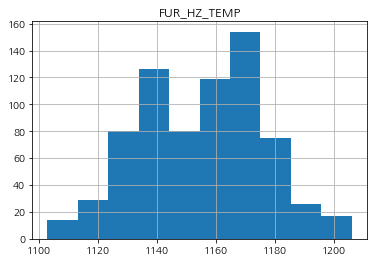

In [50]:
outlier(df, 'FUR_HZ_TEMP')

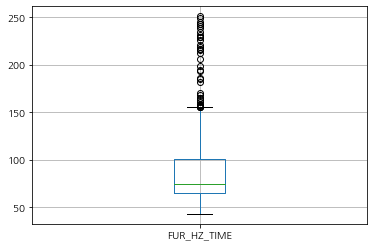

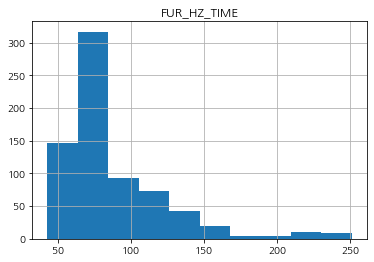

In [66]:
outlier(df, 'FUR_HZ_TIME')

In [51]:
df[df['FUR_HZ_TIME']>160]

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
469,양품,T,55.02,3055,13429,17720,1144,165,1131,52,355,1120,896,적용,6
475,양품,T,70.10,2280,15860,19900,1140,163,1125,69,366,1113,869,적용,6
481,양품,T,70.10,2280,15860,19900,1142,161,1128,66,366,1116,869,적용,6
543,양품,C,13.06,2878,51075,15070,1156,168,1145,94,342,1136,934,적용,10
544,양품,C,13.06,2912,48368,14440,1158,194,1147,79,342,1140,909,적용,10
546,양품,C,16.00,2930,40950,75350,1151,165,1144,90,342,1138,960,적용,10
548,양품,C,17.10,2804,51488,58140,1142,170,1147,69,342,1137,957,적용,10
549,양품,C,18.11,3122,47067,41780,1138,217,1148,62,342,1137,957,적용,10
550,양품,C,18.11,3133,48877,21770,1138,239,1150,62,342,1136,956,적용,10
551,불량,C,19.13,3133,49693,46760,1142,226,1153,55,342,1144,993,미적용,10


일부 이상치처럼 보이기는 하나 가열로 가열대 시간을 길게 했을 때 충분히 발생할 수 있는 값으로 이상치라고 판단하지 않았다.

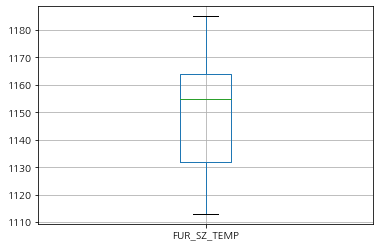

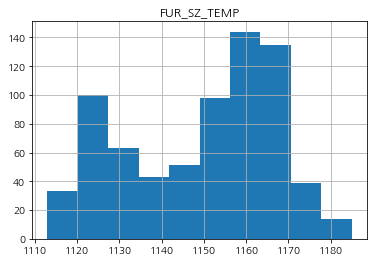

In [53]:
outlier(df, 'FUR_SZ_TEMP')

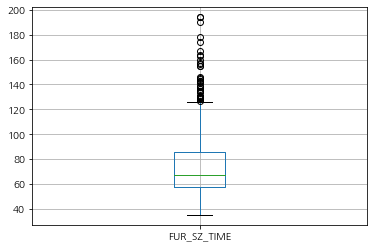

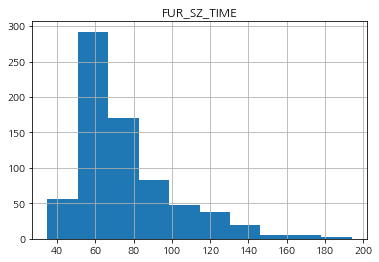

In [54]:
outlier(df, 'FUR_SZ_TIME')

일부 이상치처럼 보이기는 하나 가열로 균열대 시간을 길게 했을 때 충분히 발생할 수 있는 값으로 이상치라고 판단하지 않았다.

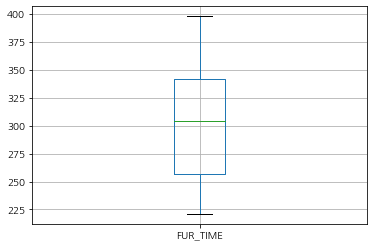

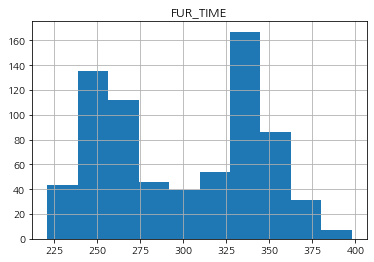

In [55]:
outlier(df, 'FUR_TIME')

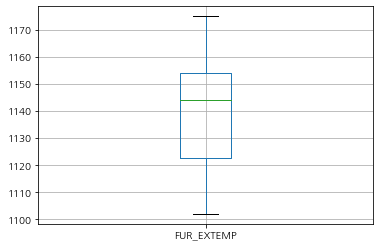

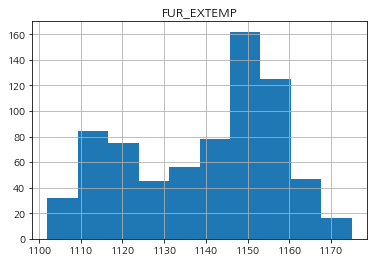

In [56]:
outlier(df, 'FUR_EXTEMP')

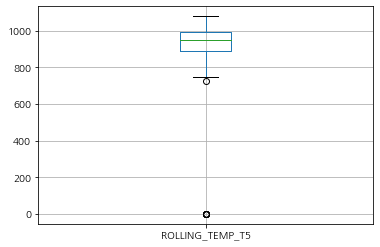

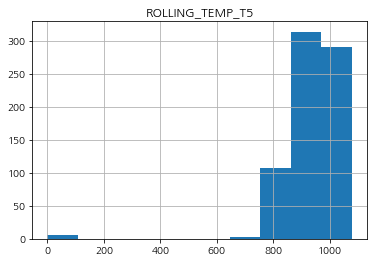

In [57]:
outlier(df, 'ROLLING_TEMP_T5')

압연온도가 0도 인 것은 불가능하다. 따라서 압연온도가 0도인 이상치 데이터를 확인하고 제거한다.

In [58]:
df=df.drop(index=df[df['ROLLING_TEMP_T5']<400].index)

In [59]:
df.shape

(714, 15)

이상치 제거 완료.

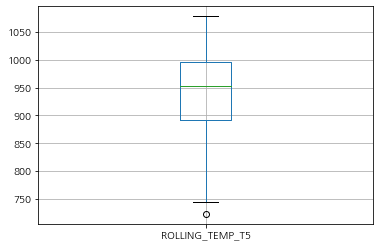

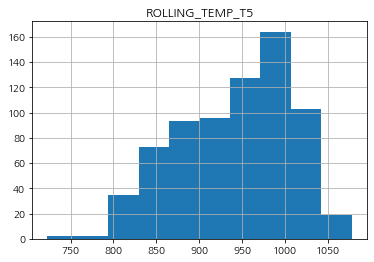

In [60]:
outlier(df, 'ROLLING_TEMP_T5')

In [94]:
df[df['ROLLING_TEMP_T5']<800]

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
74,양품,T,73.71,2725,9754,15380,1113,96,1122,68,310,1109,773,적용,6
77,양품,T,75.71,2725,9749,15790,1123,79,1126,61,291,1116,760,적용,6
448,양품,T,40.35,2511,22669,36060,1178,90,1127,138,333,1114,745,적용,6
519,양품,C,13.06,3445,53682,18960,1147,73,1129,164,342,1124,723,적용,10


압연온도가 0도인 데이터를 확인하고 box plot 상에서 일부 이상치로 보이는 데이터가 확인되기도 하나 압연온도가 낮았을 가능성도 있으므로 이상치로 판단하지 않고 진행한다.

가열로의 재로시간은 가열로의 균열대와 가열대에서의 시간을 합한 것보다 커야한다. 따라서 재로시간이 더 작다면 이상치이다. 이를 판단하기 위해 아래와 같이 진행한다.

In [62]:
df[['FUR_HZ_TIME', 'FUR_SZ_TIME', 'FUR_TIME']]

,FUR_HZ_TIME,FUR_SZ_TIME,FUR_TIME
0,116,59,282
1,122,53,283
2,116,55,282
3,125,68,316
4,134,48,314
...,...,...,...
715,72,62,245
716,61,61,238
717,65,77,247
718,86,45,243


In [63]:
df[df['FUR_HZ_TIME']+df['FUR_SZ_TIME'] > df['FUR_TIME']]

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING


가열로 재로시간이 균열대와 가열대 시간을 합한 것보다 작은 값은 존재하지 않는다. 따라서 이상치는 존재하지 않는다.

In [64]:
df.shape

(714, 15)

최종적으로 결측치와 이상치 처리를 완료했을 때 남은 데이터 개수 총 714개, 변수 15개이다.

In [68]:
# 인덱스 재설정
df.reset_index(drop=True, inplace=True)

In [70]:
df

,SCALE,STEEL_KIND,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,양품,T,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,적용,8
1,양품,T,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,적용,8
2,양품,T,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,적용,8
3,양품,T,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,적용,8
4,양품,T,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,적용,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,불량,C,20.14,3580,38639,21870,1172,72,1164,62,245,1155,1005,적용,8
710,양품,C,15.08,3212,48233,18340,1150,61,1169,61,238,1160,947,적용,10
711,양품,C,16.60,3441,43688,19590,1169,65,1163,77,247,1152,948,적용,10
712,양품,C,15.59,3363,48740,80240,1179,86,1163,45,243,1154,940,적용,10


## 설명변수 간 상관관계 파악

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SCALE              714 non-null    object 
 1   STEEL_KIND         714 non-null    object 
 2   PT_THICK           714 non-null    float64
 3   PT_WIDTH           714 non-null    int64  
 4   PT_LENGTH          714 non-null    int64  
 5   PT_WEIGHT          714 non-null    int64  
 6   FUR_HZ_TEMP        714 non-null    int64  
 7   FUR_HZ_TIME        714 non-null    int64  
 8   FUR_SZ_TEMP        714 non-null    int64  
 9   FUR_SZ_TIME        714 non-null    int64  
 10  FUR_TIME           714 non-null    int64  
 11  FUR_EXTEMP         714 non-null    int64  
 12  ROLLING_TEMP_T5    714 non-null    int64  
 13  HSB                714 non-null    object 
 14  ROLLING_DESCALING  714 non-null    int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 83.8+ KB


범주형 변수인 'SCALE', 'STEEL_KIND', 'HSB'를 제외하고 연속형 변수끼리의 상관분석을 시행한다.

<AxesSubplot:>

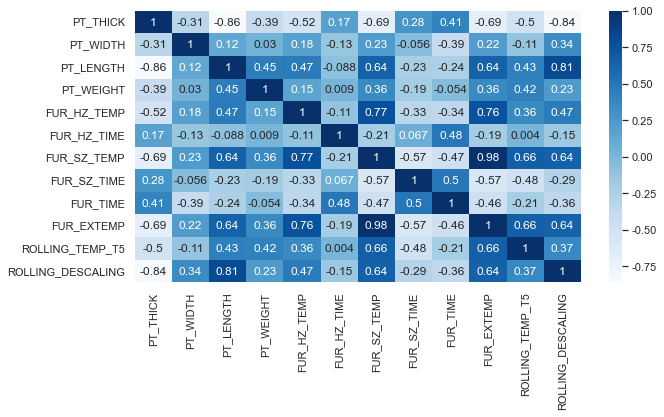

In [79]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.heatmap(df.corr().round(3), annot=True, cmap='Blues')

상관분석 결과, <br>
- PT_LENGTH와 PT_THICK간의 강한 음의 상관관계
- FUR_SZ_TEMP와 PT_THICK 간의 음의 상관관계
- FUR_SZ_TEMP와 PT_LENGTH 간의 양의 상관관계
- FUR_SZ_TEMP와 FUR_HZ_TEMP 간의 양의 상관관계,
- FUR_EXTEMP와 PT_LENGTH 간의 양의 상관관계
- FUR_EXTEMP와 FUR_HZ_TEMP 간의 양의 상관관계,
- FUR_EXTEMP와 FUR_SZ_TEMP 간의 강한 양의 상관관계,
- ROLLING_TEMP_T5와 FUR_SZ_TEMP간의 양의 상관관계
- ROLLING_TEMP_T5와 FUR_EXTEMP 간의 양의 상관관계
- ROLLING_DESCALING과 PT_LENGTH 간의 강한 양의 상관관계
- ROLLING_DESCALING과 FUR_SZ_TEMP 간의 양의 상관관계
- ROLLING_DESCALING과 FUR_EXTEMP 간의 양의 상관관계
가 확인된다.

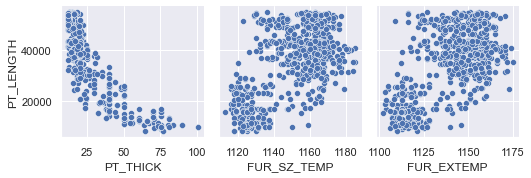

In [82]:
sns.pairplot(df, y_vars='PT_LENGTH', x_vars=['PT_THICK', 'FUR_SZ_TEMP', 'FUR_EXTEMP'])

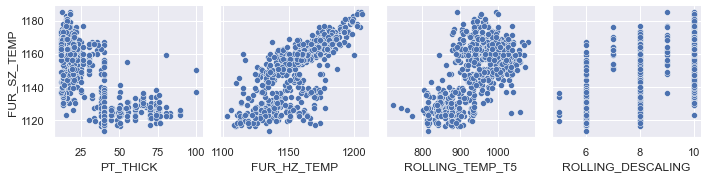

In [83]:
sns.pairplot(df, y_vars='FUR_SZ_TEMP', x_vars=['PT_THICK', 'FUR_HZ_TEMP', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING'])

따라서 연속형 설명변수 간의 상관관계가 강하기 때문에 핵심인자를 도출하기 위해 일부 변수를 제거하는 것은 변수 간의 상관성을 반영하지 못해 모델의 신뢰성을 저해한다고 판단하였다. 따라서 연속형 변수 간 차원축소를 진행한다.

## 주성분 분석(PCA)

### 데이터 구분

In [105]:
# 설명변수와 목표변수 간의 데이터 구분
df_y=df['SCALE']
df_x=df.drop('SCALE', axis=1)

In [107]:
# df_x의 연속형 변수와 범주형 변수간의 구분
df_x_cate=df_x[['STEEL_KIND','HSB']]
df_x_cont=df_x.drop(['STEEL_KIND', 'HSB'], axis=1)
df_x_cont.head()

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,32.25,3707,15109,14180,1144,116,1133,59,282,1125,934,8
1,32.25,3707,15109,14180,1144,122,1135,53,283,1120,937,8
2,33.27,3619,19181,18130,1129,116,1121,55,282,1106,889,8
3,33.27,3619,19181,18130,1152,125,1127,68,316,1113,885,8
4,38.33,3098,13334,12430,1140,134,1128,48,314,1118,873,8


### 변수 간 상관관계 출력

<AxesSubplot:>

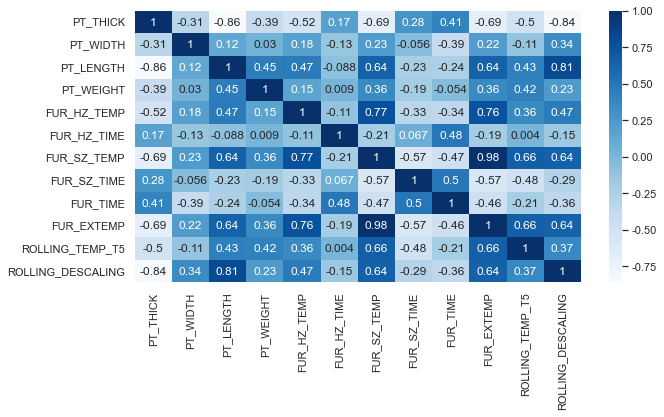

In [109]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.heatmap(df.corr().round(3), annot=True, cmap='Blues')

연속형 변수 간의 상관관계가 높음.

In [111]:
df_x_cont.describe().round(3)

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000
mean,29.108,2809.885,34404.029,41506.078,1155.459,88.237,1149.775,75.398,300.183,1139.664,941.769,8.328
std,18.995,516.293,13799.227,24799.277,20.845,36.361,17.508,26.175,45.297,17.805,65.811,1.618
min,12.030,1800.000,7893.000,7820.000,1103.000,43.000,1113.000,35.000,221.000,1102.000,723.000,5.000
25%,16.090,2469.000,22664.500,17780.000,1139.000,65.000,1133.000,57.000,257.000,1123.000,891.000,7.000
50%,20.130,2727.500,37380.000,36090.000,1158.000,74.500,1155.000,68.000,304.000,1144.000,952.000,8.000
75%,38.430,3125.000,43771.750,61120.000,1171.000,101.000,1164.000,86.000,342.000,1154.000,995.000,10.000
max,100.340,4575.000,54917.000,115080.000,1206.000,251.000,1185.000,194.000,398.000,1175.000,1078.000,10.000


주성분 분석을 위해 scaling 필요

### Scaling

In [112]:
x_cols=df_x_cont.columns
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_x_cont)
df_scaled=pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
0,0.166,1.739,-1.399,-1.103,-0.550,0.764,-0.959,-0.627,-0.402,-0.824,-0.118,-0.203
1,0.166,1.739,-1.399,-1.103,-0.550,0.929,-0.844,-0.856,-0.380,-1.105,-0.073,-0.203
2,0.219,1.568,-1.104,-0.943,-1.270,0.764,-1.645,-0.780,-0.402,-1.892,-0.802,-0.203
3,0.219,1.568,-1.104,-0.943,-0.166,1.012,-1.302,-0.283,0.349,-1.499,-0.863,-0.203
4,0.486,0.558,-1.528,-1.173,-0.742,1.259,-1.245,-1.047,0.305,-1.218,-1.046,-0.203


In [113]:
df_scaled.describe().round(3)

,PT_THICK,PT_WIDTH,PT_LENGTH,PT_WEIGHT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000,714.000
mean,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-0.900,-1.957,-1.923,-1.359,-2.518,-1.245,-2.102,-1.544,-1.749,-2.117,-3.327,-2.058
25%,-0.686,-0.661,-0.851,-0.957,-0.790,-0.639,-0.959,-0.703,-0.954,-0.937,-0.772,-0.821
50%,-0.473,-0.160,0.216,-0.219,0.122,-0.378,0.299,-0.283,0.084,0.244,0.156,-0.203
75%,0.491,0.611,0.679,0.791,0.746,0.351,0.813,0.405,0.924,0.806,0.809,1.034
max,3.753,3.421,1.488,2.969,2.426,4.479,2.013,4.534,2.161,1.986,2.071,1.034


### 주성분 분석

In [134]:
pca=PCA(n_components=8)
nd_pca=pca.fit_transform(df_scaled)
df_pca=pd.DataFrame(nd_pca, columns=['Prin1', 'Prin2', 'Prin3', 'Prin4', 'Prin5', 'Prin6', 'Prin7', 'Prin8'])

In [135]:
df_pca_stat=pd.DataFrame()
df_pca_stat['PrinNo']=[i for i in range(1,9)]
df_pca_stat['EigenValues']=pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenVauleRatio']=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenVauleRatio
0,1,5.700,0.474,0.474
1,2,1.572,0.131,0.605
2,3,1.283,0.107,0.712
3,4,0.910,0.076,0.788
4,5,0.807,0.067,0.855
5,6,0.631,0.053,0.907
6,7,0.420,0.035,0.942
7,8,0.305,0.025,0.968


공분산 기준으로 고유값 누적비율 > 0.8인 주성분 5개를 선택한다.

In [136]:
# 주성분 분석 결과 고유벡터(eigenvector)확인 및 해석
x_cols=pd.DataFrame({"Feature": df_x_cont.columns})
df_eigenvector=pd.concat([x_cols, pd.DataFrame(pca.components_[:5].T*-1,\
                                              columns=['Prin1', 'Prin2', 'Prin3', 'Prin4', 'Prin5'])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5
0,PT_THICK,-0.361,0.030,0.333,-0.084,-0.039
1,PT_WIDTH,0.126,0.465,-0.338,-0.280,-0.569
2,PT_LENGTH,0.333,-0.176,-0.366,0.133,0.143
3,PT_WEIGHT,0.186,-0.355,-0.087,0.506,-0.484
4,FUR_HZ_TEMP,0.302,0.029,0.087,-0.410,0.338
5,FUR_HZ_TIME,-0.101,-0.502,-0.101,-0.624,-0.375
6,FUR_SZ_TEMP,0.393,-0.025,0.159,-0.135,0.088
7,FUR_SZ_TIME,-0.239,-0.023,-0.538,0.086,0.329
8,FUR_TIME,-0.235,-0.503,-0.221,-0.146,0.176
9,FUR_EXTEMP,0.390,-0.035,0.161,-0.136,0.083


### 최종 데이터셋

In [143]:
# PCA를 통해 연속형 변수를 변수 5개로 차원을 축소 시킴
df_pca=df_pca[['Prin1', 'Prin2', 'Prin3', 'Prin4', 'Prin5']]
df_pca

,Prin1,Prin2,Prin3,Prin4,Prin5
0,1.309794,-1.353885,-0.130769,1.252393,1.576344
1,1.328906,-1.256539,-0.219131,1.349503,1.725809
2,2.278312,-1.437956,0.380964,0.655870,1.921740
3,1.994300,-0.955485,0.643984,1.438620,1.279315
4,2.326340,-0.600093,-0.307024,1.397741,1.172691
...,...,...,...,...,...
709,-1.860583,-1.393153,-0.583762,0.745229,0.277483
710,-2.220841,-1.509362,0.143272,0.109960,-0.225479
711,-1.913041,-1.634984,0.577915,0.569235,-0.333058
712,-2.900040,-0.463412,0.247424,-0.083741,1.167978


In [147]:
# 범주형 변수 저장
df_x_cate.head()

,STEEL_KIND,HSB
0,T,적용
1,T,적용
2,T,적용
3,T,적용
4,T,적용


In [148]:
# 범주형 변수와 PCA를 통해 축소된 연속형 변수 concat으로 최종 데이터셋 완성
df_x=pd.concat([df_pca, df_x_cate], axis=1)
df_x

,Prin1,Prin2,Prin3,Prin4,Prin5,STEEL_KIND,HSB
0,1.309794,-1.353885,-0.130769,1.252393,1.576344,T,적용
1,1.328906,-1.256539,-0.219131,1.349503,1.725809,T,적용
2,2.278312,-1.437956,0.380964,0.655870,1.921740,T,적용
3,1.994300,-0.955485,0.643984,1.438620,1.279315,T,적용
4,2.326340,-0.600093,-0.307024,1.397741,1.172691,T,적용
...,...,...,...,...,...,...,...
709,-1.860583,-1.393153,-0.583762,0.745229,0.277483,C,적용
710,-2.220841,-1.509362,0.143272,0.109960,-0.225479,C,적용
711,-1.913041,-1.634984,0.577915,0.569235,-0.333058,C,적용
712,-2.900040,-0.463412,0.247424,-0.083741,1.167978,C,적용


In [150]:
df_y=pd.DataFrame(df_y)

In [152]:
df2=pd.concat([df_y, df_x], axis=1)
df2.head()

,SCALE,Prin1,Prin2,Prin3,Prin4,Prin5,STEEL_KIND,HSB
0,양품,1.309794,-1.353885,-0.130769,1.252393,1.576344,T,적용
1,양품,1.328906,-1.256539,-0.219131,1.349503,1.725809,T,적용
2,양품,2.278312,-1.437956,0.380964,0.655870,1.921740,T,적용
3,양품,1.994300,-0.955485,0.643984,1.438620,1.279315,T,적용
4,양품,2.326340,-0.600093,-0.307024,1.397741,1.172691,T,적용


# 모델링

## 로지스틱 회귀분석

### train data (0.7) : test data(0.3) 데이터 분할

로지스틱 회귀분석 이전에 목표변수를 0과 1에 mapping한다.

In [154]:
import copy
df3=copy.deepcopy(df2)
df3.head()

,SCALE,Prin1,Prin2,Prin3,Prin4,Prin5,STEEL_KIND,HSB
0,양품,1.309794,-1.353885,-0.130769,1.252393,1.576344,T,적용
1,양품,1.328906,-1.256539,-0.219131,1.349503,1.725809,T,적용
2,양품,2.278312,-1.437956,0.380964,0.655870,1.921740,T,적용
3,양품,1.994300,-0.955485,0.643984,1.438620,1.279315,T,적용
4,양품,2.326340,-0.600093,-0.307024,1.397741,1.172691,T,적용


In [155]:
a={'양품':0,'불량':1}
df3['SCALE']=df3['SCALE'].map(a)

In [162]:
df3

,SCALE,Prin1,Prin2,Prin3,Prin4,Prin5,STEEL_KIND,HSB
0,0,1.309794,-1.353885,-0.130769,1.252393,1.576344,T,적용
1,0,1.328906,-1.256539,-0.219131,1.349503,1.725809,T,적용
2,0,2.278312,-1.437956,0.380964,0.655870,1.921740,T,적용
3,0,1.994300,-0.955485,0.643984,1.438620,1.279315,T,적용
4,0,2.326340,-0.600093,-0.307024,1.397741,1.172691,T,적용
...,...,...,...,...,...,...,...,...
709,1,-1.860583,-1.393153,-0.583762,0.745229,0.277483,C,적용
710,0,-2.220841,-1.509362,0.143272,0.109960,-0.225479,C,적용
711,0,-1.913041,-1.634984,0.577915,0.569235,-0.333058,C,적용
712,0,-2.900040,-0.463412,0.247424,-0.083741,1.167978,C,적용


In [158]:
df_train, df_test=train_test_split(df3, test_size=0.3)
print('train data : {}'.format(df_train.shape))
print('test data : {}'.format(df_test.shape))

train data : (499, 8)
test data : (215, 8)


train data 총 499개, test data 총 215개로 구성된다.

### 로지스틱 회귀모델

로지스틱 회귀분석 모델 생성. Prin1, Prin2, Prin3, Prin4, Prin5는 이미 scaling 되어있음.

In [165]:
log_model=Logit.from_formula("SCALE ~ Prin1 + Prin2 + Prin3 + Prin4 + Prin5 + C(STEEL_KIND) + C(HSB)", df_train)
log_result=log_model.fit(method='bfgs')
print(log_result.summary())

         Current function value: 0.284391
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  499
Model:                          Logit   Df Residuals:                      491
Method:                           MLE   Df Model:                            7
Date:                Wed, 09 Nov 2022   Pseudo R-squ.:                  0.5467
Time:                        02:30:20   Log-Likelihood:                -141.91
converged:                      False   LL-Null:                       -313.05
Covariance Type:            nonrobust   LLR p-value:                 5.547e-70
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             23.6163   4401.266      0.005      0.9

### 모델 성능

In [166]:
# train 데이터 예측
y_pred_train=log_result.predict(df_train)
y_pred_train_class=(y_pred_train > 0.5).astype(int)
print('Train 예측 결과 \n', y_pred_train_class.head(), '\n')
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_train['SCALE'],y_pred_train_class)), '\n')

Train 예측 결과 
 572    1
326    0
311    0
273    0
362    0
dtype: int32 

Confusion Matrix : 
[[314  25]
 [ 31 129]] 



In [182]:
# test 데이터 예측
y_pred_test=log_result.predict(df_test)
y_pred_test_class=(y_pred_test > 0.5).astype(int)
print('Train 예측 결과 \n', y_pred_test_class.head(), '\n')
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test['SCALE'], y_pred_test_class)), '\n')

Train 예측 결과 
 524    0
94     0
505    0
305    0
679    0
dtype: int32 

Confusion Matrix : 
[[132  12]
 [ 18  53]] 



In [171]:
print('Train 예측/분류 결과')
print('train data Accuracy : {0:.3f}\n'.format(accuracy_score(df_train['SCALE'], y_pred_train_class)))
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_train['SCALE'], y_pred_train_class)), '\n')
print(classification_report(df_train['SCALE'], y_pred_train_class, digits=3))

Train 예측/분류 결과
Accuracy : 0.888

Confusion Matrix : 
[[314  25]
 [ 31 129]] 

              precision    recall  f1-score   support

           0      0.910     0.926     0.918       339
           1      0.838     0.806     0.822       160

    accuracy                          0.888       499
   macro avg      0.874     0.866     0.870       499
weighted avg      0.887     0.888     0.887       499



In [183]:
print('Test 예측/분류 결과')
print('Accuracy : {0:.3f}\n'.format(accuracy_score(df_test['SCALE'], y_pred_test_class)))
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test['SCALE'], y_pred_test_class)), '\n')
print(classification_report(df_test['SCALE'], y_pred_test_class, digits=3))

Test 예측/분류 결과
Accuracy : 0.860

Confusion Matrix : 
[[132  12]
 [ 18  53]] 

              precision    recall  f1-score   support

           0      0.880     0.917     0.898       144
           1      0.815     0.746     0.779        71

    accuracy                          0.860       215
   macro avg      0.848     0.832     0.839       215
weighted avg      0.859     0.860     0.859       215



### 설명변수 중요도

<AxesSubplot:>

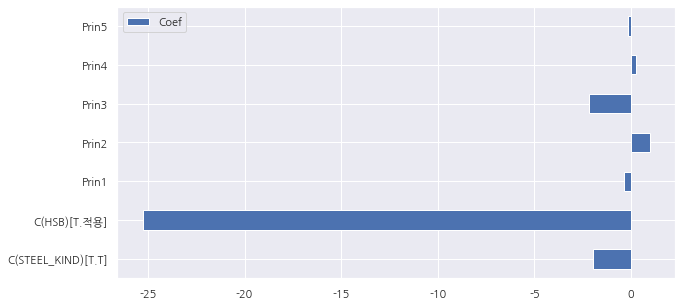

In [187]:
df_logistic_coef=pd.DataFrame({'Coef' : log_result.params.values[1:]}, index=log_model.exog_names[1:])
df_logistic_coef.plot.barh(y='Coef')

## 의사결정나무

In [192]:
df3.head()

,SCALE,Prin1,Prin2,Prin3,Prin4,Prin5,STEEL_KIND,HSB
0,0,1.309794,-1.353885,-0.130769,1.252393,1.576344,T,적용
1,0,1.328906,-1.256539,-0.219131,1.349503,1.725809,T,적용
2,0,2.278312,-1.437956,0.380964,0.655870,1.921740,T,적용
3,0,1.994300,-0.955485,0.643984,1.438620,1.279315,T,적용
4,0,2.326340,-0.600093,-0.307024,1.397741,1.172691,T,적용


### train data (0.7) : test data(0.3) 데이터 분할

In [194]:
# 더미변수 생성
df3_dummy=pd.get_dummies(df3)
df3_dummy.head()

,SCALE,Prin1,Prin2,Prin3,Prin4,Prin5,STEEL_KIND_C,STEEL_KIND_T,HSB_미적용,HSB_적용
0,0,1.309794,-1.353885,-0.130769,1.252393,1.576344,0,1,0,1
1,0,1.328906,-1.256539,-0.219131,1.349503,1.725809,0,1,0,1
2,0,2.278312,-1.437956,0.380964,0.655870,1.921740,0,1,0,1
3,0,1.994300,-0.955485,0.643984,1.438620,1.279315,0,1,0,1
4,0,2.326340,-0.600093,-0.307024,1.397741,1.172691,0,1,0,1


In [195]:
df_x_dummy=df3_dummy.drop('SCALE', axis=1, inplace=False)
df_y_dummy=df3_dummy['SCALE']

df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_x_dummy, df_y_dummy, test_size=0.3)

print("train data : ", df_train_x.shape)
print("test data : ", df_test_x.shape)

train data :  (499, 9)
test data :  (215, 9)


train data 499개, test data 215개로 진행

### 기본옵션으로 모델 생성

In [196]:
tree_uncustomized=DecisionTreeClassifier()
tree_uncustomized.fit(df_train_x, df_train_y)
print('train data accuracy : {}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('test data accuracy : {}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

train data accuracy : 1.0
test data accuracy : 0.8511627906976744


따라서 train data 100%, test data 85.1%이므로 과대적합

### max_depth : 최대 깊이 변경에 따른 모델 성능

In [199]:
train_accuracy=[]; test_accuracy=[]
para_depth=[depth for depth in range(1,11)]
for v_max_depth in para_depth :
    tree=DecisionTreeClassifier(max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['Train Accuracy']=train_accuracy
df_accuracy_depth['Test Accuracy']=test_accuracy

In [200]:
df_accuracy_depth.round(3)

,Depth,Train Accuracy,Test Accuracy
0,1,0.705,0.688
1,2,0.814,0.763
2,3,0.864,0.833
3,4,0.898,0.874
4,5,0.918,0.874
5,6,0.936,0.870
6,7,0.956,0.842
7,8,0.970,0.856
8,9,0.976,0.842
9,10,0.990,0.837


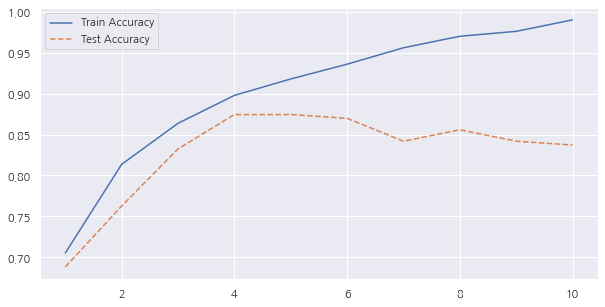

In [201]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

최대 깊이 증가하면서 train data에 과대적합된다. 따라서 모델의 성능을 고려하며 과대적합을 방지하기 위하여 max_depth로 4를 선정

### min_samples_split : 분리 노드의 최소 자료수 변경에 따른 모델 성능

In [202]:
train_accuracy=[]; test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]
for v_min_samples_split in para_split :
    tree=DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth=4)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesSplit']=para_split
df_accuracy_split['Train Accuracy']=train_accuracy
df_accuracy_split['Test Accuracy']=test_accuracy

In [203]:
df_accuracy_split.round(3)

,MinSamplesSplit,Train Accuracy,Test Accuracy
0,10,0.898,0.879
1,20,0.896,0.888
2,30,0.896,0.888
3,40,0.892,0.888
4,50,0.892,0.888
5,60,0.860,0.851
6,70,0.838,0.800
7,80,0.838,0.800
8,90,0.838,0.800
9,100,0.838,0.800


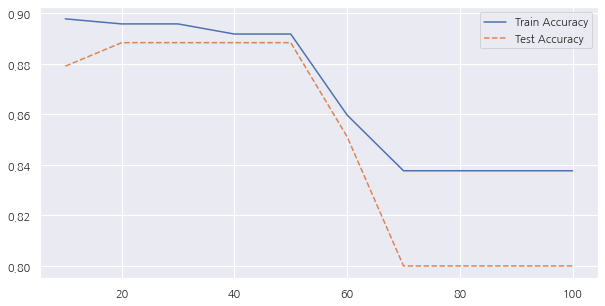

In [204]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

분리 노드의 최소 자료수가 증가하면서 train data와 test data에서 모두 성능 저하가 나타났다. 따라서 모델의 성능을 고려하여 min_samples_split로 40을 선정.

### min_samples_leaf : 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능

In [222]:
train_accuracy=[]; test_accuracy=[]
para_leaf=[n_leaf*2 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf :
    tree=DecisionTreeClassifier(min_samples_split=40, max_depth=4, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf']=para_leaf
df_accuracy_leaf['Train Accuracy']=train_accuracy
df_accuracy_leaf['Test Accuracy']=test_accuracy

In [223]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Train Accuracy,Test Accuracy
0,2,0.892,0.888
1,4,0.890,0.888
2,6,0.878,0.879
3,8,0.878,0.879
4,10,0.860,0.847
5,12,0.860,0.847
6,14,0.860,0.847
7,16,0.860,0.847
8,18,0.854,0.823
9,20,0.852,0.823


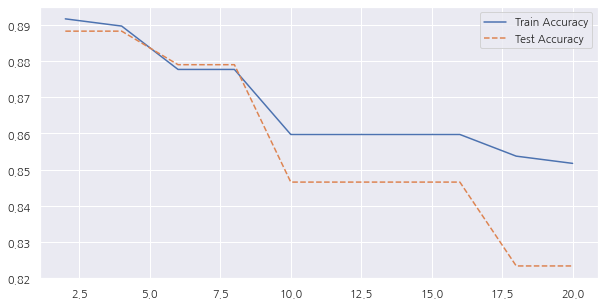

In [208]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

잎사귀 노드의 최소 자료수가 증가하면서 일부 train data에서 과소적합 현상이 발생하였다. 따라서 과소적합 현상을 방지하기 위해 min_samples_leaf는 4으로 선정.

### 최종 모델 선정

In [228]:
tree=DecisionTreeClassifier(min_samples_split=40, max_depth=4, min_samples_leaf=4)
tree.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=40)

### 모델 성능

In [246]:
y_pred=tree.predict(df_test_x)
print("Train data Accuracy : {0:3f}\n".format(tree.score(df_train_x, df_train_y)))
print("Test data Accuracy : {0:3f}\n".format(tree.score(df_test_x, df_test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Train data Accuracy : 0.889780

Test data Accuracy : 0.888372

Confusion Matrix : 
[[148   8]
 [ 16  43]]
              precision    recall  f1-score   support

           0      0.902     0.949     0.925       156
           1      0.843     0.729     0.782        59

    accuracy                          0.888       215
   macro avg      0.873     0.839     0.853       215
weighted avg      0.886     0.888     0.886       215



### 변수 중요도

In [251]:
v_feature_name=df_train_x.columns
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree.feature_importances_
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,Prin3,0.318
6,STEEL_KIND_T,0.245
1,Prin2,0.214
8,HSB_적용,0.156
3,Prin4,0.041
0,Prin1,0.027
4,Prin5,0.000
5,STEEL_KIND_C,0.000
7,HSB_미적용,0.000


Text(0, 0.5, '설명변수')

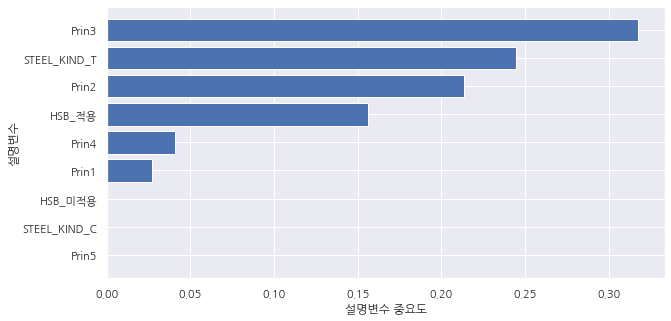

In [252]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## 랜덤포레스트

위에서 구성한 train data, test data를 그대로 사용한다.

### 기본옵션으로 모델 생성

In [221]:
rf=RandomForestClassifier()
rf.fit(df_train_x, df_train_y)
print("train data accuracy : {}".format(rf.score(df_train_x, df_train_y)))
print("test data accuracy : {}".format(rf.score(df_test_x, df_test_y)))

train data accuracy : 1.0
test data accuracy : 0.8930232558139535


train data 100%, test data 89.3% 이므로 과대적합.

### n_estimators : 트리수 변경에 따른 모델 성능

In [231]:
train_accuracy=[]; test_accuracy=[]
para_n_tree=[n_tree*10 for n_tree in range(1,16)]
for v_n_estimators in para_n_tree :
    rf=RandomForestClassifier(n_estimators=v_n_estimators)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['Train Accuracy']=train_accuracy
df_accuracy_n['Test Accuracy']=test_accuracy

In [232]:
df_accuracy_n.round(3)

,n_estimators,Train Accuracy,Test Accuracy
0,10,0.980,0.860
1,20,1.000,0.874
2,30,1.000,0.893
3,40,1.000,0.893
4,50,1.000,0.902
5,60,1.000,0.888
6,70,1.000,0.902
7,80,0.998,0.907
8,90,1.000,0.884
9,100,1.000,0.893


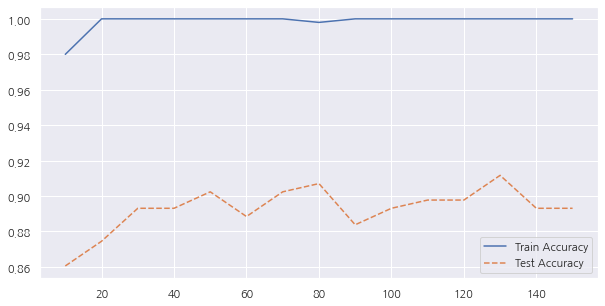

In [233]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

tree 수가 증가할수록 모델의 성능은 좋아진다. 따라서 과대적합과 test data의 성능을 고려하여 n_estimators로 130 선정.

### max_depth : 최대 깊이 변경에 따른 모델 성능

In [234]:
train_accuracy=[]; test_accuracy=[]
para_depth=[depth for depth in range(1,11)]
for v_max_depth in para_depth :
    rf=RandomForestClassifier(n_estimators=130, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['Train Accuracy']=train_accuracy
df_accuracy_depth['Test Accuracy']=test_accuracy

In [235]:
df_accuracy_depth.round(3)

,Depth,Train Accuracy,Test Accuracy
0,1,0.675,0.735
1,2,0.858,0.884
2,3,0.882,0.879
3,4,0.896,0.884
4,5,0.914,0.907
5,6,0.940,0.898
6,7,0.954,0.907
7,8,0.970,0.907
8,9,0.986,0.912
9,10,0.992,0.912


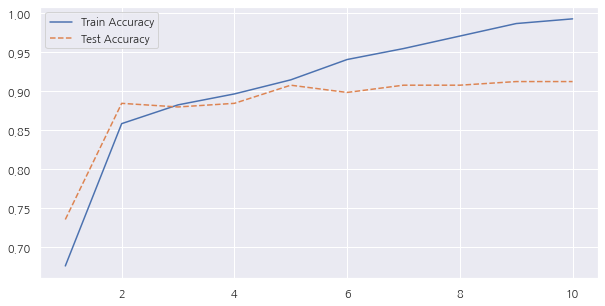

In [236]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

max_depth가 증가할수록 모델은 과소적합의 경향성을 보인다. 따라서 과소적합을 방지하기 위해 max_depth는 3으로 선정.

### min_samples_split : 분리 노드의 최소 자료수 변경에 따른 모델 성능

In [237]:
train_accuracy=[]; test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]
for v_min_samples_split in para_split :
    rf=RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth=3, n_estimators=130)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesSplit']=para_split
df_accuracy_split['Train Accuracy']=train_accuracy
df_accuracy_split['Test Accuracy']=test_accuracy

In [238]:
df_accuracy_split.round(3)

,MinSamplesSplit,Train Accuracy,Test Accuracy
0,10,0.876,0.879
1,20,0.880,0.870
2,30,0.880,0.870
3,40,0.882,0.884
4,50,0.876,0.898
5,60,0.892,0.884
6,70,0.880,0.884
7,80,0.878,0.884
8,90,0.872,0.870
9,100,0.858,0.814


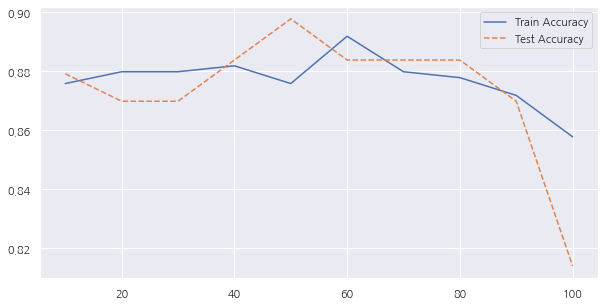

In [239]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

분리 노드의 최소 자료수가 증가하며 train data와 test data 사이에 과소적합이 나타났다가 해소되는 경향성을 보이고 있다. 따라서 과소적합을 방지하고 모델의 성능을 고려하여 min_samples_split로 30을 선정.

### min_samples_leaf : 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능

In [240]:
train_accuracy=[]; test_accuracy=[]
para_leaf=[n_leaf*5 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf :
    rf=RandomForestClassifier(min_samples_split=30, max_depth=3,n_estimators=130, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf']=para_leaf
df_accuracy_leaf['Train Accuracy']=train_accuracy
df_accuracy_leaf['Test Accuracy']=test_accuracy

In [241]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Train Accuracy,Test Accuracy
0,5,0.868,0.879
1,10,0.848,0.870
2,15,0.838,0.856
3,20,0.832,0.819
4,25,0.838,0.823
5,30,0.834,0.823
6,35,0.828,0.828
7,40,0.820,0.823
8,45,0.822,0.842
9,50,0.822,0.833


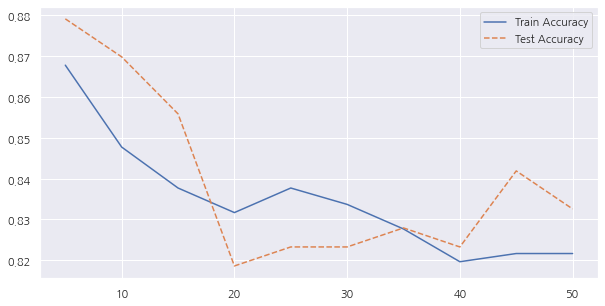

In [242]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

잎사귀 노드의 최소 자료수를 증가시킬수록 train data와 test data 모두 성능이 오히려 감소하고 있다. 따라서 잎사귀 노드의 최소 자료수를 별도로 설정하지 않는다. 

### 최종 모델 생성

In [243]:
rf=RandomForestClassifier(min_samples_split=30, max_depth=3,n_estimators=130)
rf.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=3, min_samples_split=30, n_estimators=130)

### 모델 성능

In [245]:
y_pred=rf.predict(df_test_x)
print("Train data Accuracy : {0:3f}\n".format(rf.score(df_train_x, df_train_y)))
print("Test data Accuracy : {0:3f}\n".format(rf.score(df_test_x, df_test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Train data Accuracy : 0.875752

Test data Accuracy : 0.869767

Confusion Matrix : 
[[146  10]
 [ 18  41]]
              precision    recall  f1-score   support

           0      0.890     0.936     0.912       156
           1      0.804     0.695     0.745        59

    accuracy                          0.870       215
   macro avg      0.847     0.815     0.829       215
weighted avg      0.867     0.870     0.867       215



### 변수 중요도

In [248]:
v_feature_name=df_train_x.columns
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=rf.feature_importances_
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,Prin3,0.331
1,Prin2,0.139
0,Prin1,0.130
6,STEEL_KIND_T,0.101
5,STEEL_KIND_C,0.091
7,HSB_미적용,0.089
8,HSB_적용,0.080
3,Prin4,0.022
4,Prin5,0.018


Text(0, 0.5, '설명변수')

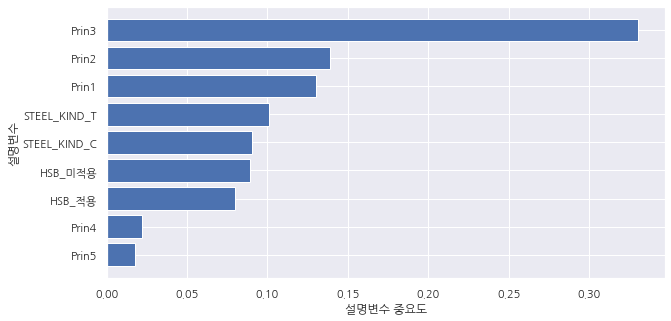

In [249]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

## 그래디언트 부스팅

위에서 구성한 train data와 test data를 그대로 사용한다.

### 기본 옵션으로 모델 생성

In [253]:
gb=GradientBoostingClassifier()
gb.fit(df_train_x, df_train_y)
print("train data accuracy : {}".format(gb.score(df_train_x, df_train_y)))
print("test data accuracy : {}".format(gb.score(df_test_x, df_test_y)))

train data accuracy : 0.9679358717434869
test data accuracy : 0.9023255813953488


### learning_rate : 학습률 변경에 따른 모델 성능

In [254]:
train_accuracy=[]; test_accuracy=[]
para_lr=[lr*0.1 for lr in range(1,10)]
for v_learning_rate in para_lr :
    gb=GradientBoostingClassifier(learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_lr=pd.DataFrame()
df_accuracy_lr['Learning rate']=para_lr
df_accuracy_lr['Train Accuracy']=train_accuracy
df_accuracy_lr['Test Accuracy']=test_accuracy

In [255]:
df_accuracy_lr.round(3)

,Learning rate,Train Accuracy,Test Accuracy
0,0.1,0.968,0.902
1,0.2,1.000,0.898
2,0.3,1.000,0.884
3,0.4,1.000,0.874
4,0.5,1.000,0.860
5,0.6,1.000,0.879
6,0.7,1.000,0.851
7,0.8,1.000,0.888
8,0.9,1.000,0.865


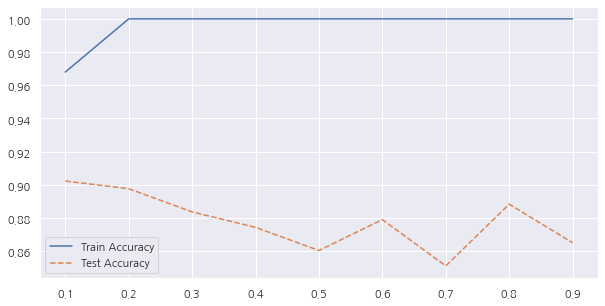

In [256]:
plt.plot(para_lr, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_lr, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

학습률이 증가할수록 train data에 과대적합되므로 learning rate으로 0.1 설정.

### n_estimators : 트리 수 변경에 따른 모델 성능

In [257]:
train_accuracy=[]; test_accuracy=[]
para_n_tree=[n_tree*10 for n_tree in range(1,16)]
for v_n_estimators in para_n_tree :
    gb=GradientBoostingClassifier(learning_rate=0.1, n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n['n_estimators']=para_n_tree
df_accuracy_n['Train Accuracy']=train_accuracy
df_accuracy_n['Test Accuracy']=test_accuracy

In [258]:
df_accuracy_n.round(3)

,n_estimators,Train Accuracy,Test Accuracy
0,10,0.884,0.888
1,20,0.904,0.907
2,30,0.920,0.907
3,40,0.924,0.907
4,50,0.934,0.912
5,60,0.942,0.916
6,70,0.950,0.907
7,80,0.952,0.907
8,90,0.960,0.907
9,100,0.968,0.902


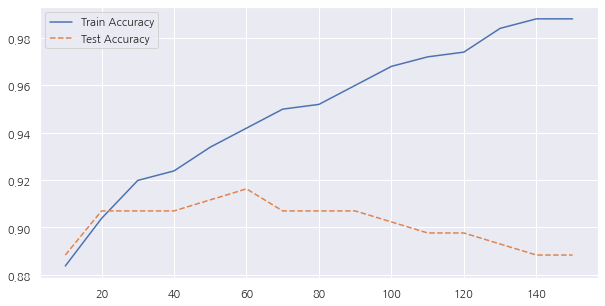

In [259]:
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

트리수가 증가할수록 train data는 과대적합 경향을 보인다. 따라서 모델의 성능을 고려하여 n_estimators로 60선정.

### max_depth : 최대 깊이 변경에 따른 모델 성능

In [260]:
train_accuracy=[]; test_accuracy=[]
para_depth=[depth for depth in range(1,11)]
for v_max_depth in para_depth :
    gb=GradientBoostingClassifier(n_estimators=60,learning_rate=0.1, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_depth=pd.DataFrame()
df_accuracy_depth['Depth']=para_depth
df_accuracy_depth['Train Accuracy']=train_accuracy
df_accuracy_depth['Test Accuracy']=test_accuracy

In [261]:
df_accuracy_depth.round(3)

,Depth,Train Accuracy,Test Accuracy
0,1,0.874,0.884
1,2,0.904,0.907
2,3,0.942,0.912
3,4,0.970,0.898
4,5,0.996,0.884
5,6,1.000,0.874
6,7,1.000,0.870
7,8,1.000,0.870
8,9,1.000,0.860
9,10,1.000,0.865


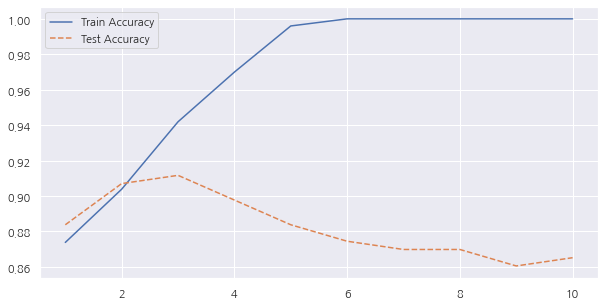

In [262]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

최대 깊이가 증가할수록 train data는 과대적합 경향을 보인다. 따라서 test data의 성능을 고려하여 max_depth로 3선정.

### min_samples_split : 분리 노드의 최소 자료수 변경에 따른 모델 성능

In [263]:
train_accuracy=[]; test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]
for v_min_samples_split in para_split :
    gb=GradientBoostingClassifier(min_samples_split=v_min_samples_split, max_depth=3, n_estimators=60, learning_rate=0.1)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_split=pd.DataFrame()
df_accuracy_split['MinSamplesSplit']=para_split
df_accuracy_split['Train Accuracy']=train_accuracy
df_accuracy_split['Test Accuracy']=test_accuracy

In [264]:
df_accuracy_split.round(3)

,MinSamplesSplit,Train Accuracy,Test Accuracy
0,10,0.936,0.916
1,20,0.938,0.898
2,30,0.934,0.893
3,40,0.934,0.893
4,50,0.934,0.898
5,60,0.934,0.898
6,70,0.932,0.898
7,80,0.928,0.893
8,90,0.934,0.884
9,100,0.932,0.884


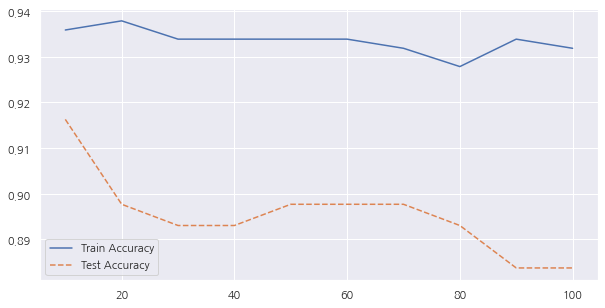

In [265]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

분리 노드의 최소 자료수가 증가할수록 test data의 성능이 감소하는 경향을 보인다. 따라서 test data의 성능을 고려하여 min_samples_split로 10선정.

### min_samples_leaf : 잎사귀 노드의 최소 자료수 변경에 따른 모델 성능

In [266]:
train_accuracy=[]; test_accuracy=[]
para_leaf=[n_leaf*5 for n_leaf in range(1,11)]
for v_min_samples_leaf in para_leaf :
    gb=GradientBoostingClassifier(min_samples_split=10, max_depth=3,n_estimators=130, min_samples_leaf=v_min_samples_leaf, learning_rate=0.1)
    gb.fit(df_train_x, df_train_y)
    train_accuracy.append(gb.score(df_train_x, df_train_y))
    test_accuracy.append(gb.score(df_test_x, df_test_y))
    
df_accuracy_leaf=pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf']=para_leaf
df_accuracy_leaf['Train Accuracy']=train_accuracy
df_accuracy_leaf['Test Accuracy']=test_accuracy

In [267]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,Train Accuracy,Test Accuracy
0,5,0.972,0.898
1,10,0.966,0.898
2,15,0.962,0.902
3,20,0.956,0.884
4,25,0.924,0.805
5,30,0.910,0.814
6,35,0.918,0.814
7,40,0.916,0.828
8,45,0.906,0.819
9,50,0.904,0.819


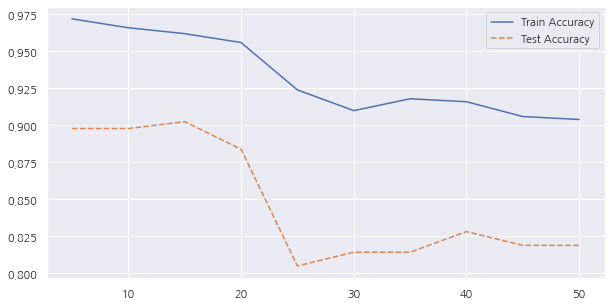

In [268]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

잎사귀 노드의 자료수가 증가할수록 train data의 성능이 감소되는 양상을 보이며 test data 역시 25 이후로 성능이 감소한다. 따라서 모든 성능을 고려하여 min_samples_leaf 15로 선정

### 최종 모델 생성

In [269]:
gb=GradientBoostingClassifier(min_samples_split=10, max_depth=3,n_estimators=130, min_samples_leaf=15, learning_rate=0.1)
gb.fit(df_train_x, df_train_y)

GradientBoostingClassifier(min_samples_leaf=15, min_samples_split=10,
                           n_estimators=130)

### 모델 성능

In [272]:
y_pred=tree.predict(df_test_x)
print("Train data Accuracy : {0:3f}\n".format(gb.score(df_train_x, df_train_y)))
print("Test data Accuracy : {0:3f}\n".format(gb.score(df_test_x, df_test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Train data Accuracy : 0.961924

Test data Accuracy : 0.902326

Confusion Matrix : 
[[148   8]
 [ 16  43]]
              precision    recall  f1-score   support

           0      0.902     0.949     0.925       156
           1      0.843     0.729     0.782        59

    accuracy                          0.888       215
   macro avg      0.873     0.839     0.853       215
weighted avg      0.886     0.888     0.886       215



### 변수 중요도

In [275]:
v_feature_name=df_train_x.columns
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=gb.feature_importances_
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
2,Prin3,0.309
1,Prin2,0.207
5,STEEL_KIND_C,0.123
6,STEEL_KIND_T,0.101
0,Prin1,0.075
8,HSB_적용,0.067
7,HSB_미적용,0.059
4,Prin5,0.032
3,Prin4,0.027


Text(0, 0.5, '설명변수')

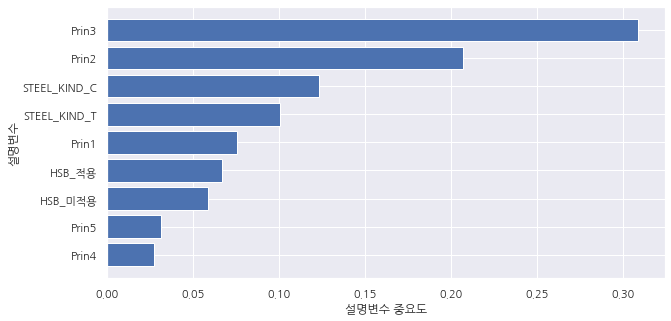

In [276]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

# 결론

## 로지스틱 회귀분석 최종 성능

In [280]:
print('Test 예측/분류 결과')
print('Accuracy : {0:.3f}\n'.format(accuracy_score(df_test['SCALE'], y_pred_test_class)))
print('Confusion Matrix : \n{}'.format(confusion_matrix(df_test['SCALE'], y_pred_test_class)), '\n')
print(classification_report(df_test['SCALE'], y_pred_test_class, digits=3))

Test 예측/분류 결과
Accuracy : 0.860

Confusion Matrix : 
[[132  12]
 [ 18  53]] 

              precision    recall  f1-score   support

           0      0.880     0.917     0.898       144
           1      0.815     0.746     0.779        71

    accuracy                          0.860       215
   macro avg      0.848     0.832     0.839       215
weighted avg      0.859     0.860     0.859       215



## 의사결정나무 최종 성능

In [281]:
y_pred=tree.predict(df_test_x)
print("Train data Accuracy : {0:3f}\n".format(tree.score(df_train_x, df_train_y)))
print("Test data Accuracy : {0:3f}\n".format(tree.score(df_test_x, df_test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Train data Accuracy : 0.889780

Test data Accuracy : 0.888372

Confusion Matrix : 
[[148   8]
 [ 16  43]]
              precision    recall  f1-score   support

           0      0.902     0.949     0.925       156
           1      0.843     0.729     0.782        59

    accuracy                          0.888       215
   macro avg      0.873     0.839     0.853       215
weighted avg      0.886     0.888     0.886       215



## 랜덤포레스트 최종 성능

In [278]:
y_pred=rf.predict(df_test_x)
print("Train data Accuracy : {0:3f}\n".format(rf.score(df_train_x, df_train_y)))
print("Test data Accuracy : {0:3f}\n".format(rf.score(df_test_x, df_test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Train data Accuracy : 0.875752

Test data Accuracy : 0.869767

Confusion Matrix : 
[[146  10]
 [ 18  41]]
              precision    recall  f1-score   support

           0      0.890     0.936     0.912       156
           1      0.804     0.695     0.745        59

    accuracy                          0.870       215
   macro avg      0.847     0.815     0.829       215
weighted avg      0.867     0.870     0.867       215



## 그래디언트 부스팅 최종 성능

In [279]:
y_pred=tree.predict(df_test_x)
print("Train data Accuracy : {0:3f}\n".format(gb.score(df_train_x, df_train_y)))
print("Test data Accuracy : {0:3f}\n".format(gb.score(df_test_x, df_test_y)))
print("Confusion Matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

print(classification_report(df_test_y, y_pred, digits=3))

Train data Accuracy : 0.961924

Test data Accuracy : 0.902326

Confusion Matrix : 
[[148   8]
 [ 16  43]]
              precision    recall  f1-score   support

           0      0.902     0.949     0.925       156
           1      0.843     0.729     0.782        59

    accuracy                          0.888       215
   macro avg      0.873     0.839     0.853       215
weighted avg      0.886     0.888     0.886       215



최종적으로 precision, recall, f1-score, accuracy 전반적으로 가장 우수했던 gradient-boosting 모델을 scale 불량 분류 모델로 채택한다.